# This script contains the following:
## 1. Import libraries and data
## 2. Build NetworkX graph
## 3. Graph visualisation - Pyvis
## 4. Community detection - Leiden Algorithm
## 5. Visualise communities
## 6. Centrality measures

### 1. Import libraries and data

In [1]:
import pandas as pd
import numpy as np
import networkx as nx
import os
import matplotlib.pyplot as plt
from pyvis.network import Network
import seaborn as sns
import pyvis


In [2]:
# Create path
path = r'/Users/ianfleming/20th-century'

In [3]:
# Import relationship data
df_relationship = pd.read_csv(os.path.join(path,'relationships.csv'))


In [4]:
# check import
df_relationship.head()

,source,target,value
0,france,germany,4
1,germany,poland,4
2,india,pakistan,3
3,china,japan,3
4,germany,italy,3


In [5]:
df_relationship.columns

Index(['source', 'target', 'value'], dtype='object')

## 2. Build NetworkX graph

In [6]:
# Create a graph from the relationships dataframe
G = nx.from_pandas_edgelist(
    df_relationship,
    source="source",
    target="target",
    edge_attr="value",
    create_using=nx.Graph()
)

print(f"Nodes: {G.number_of_nodes()}  |  Edges: {G.number_of_edges()}")


Nodes: 52  |  Edges: 91


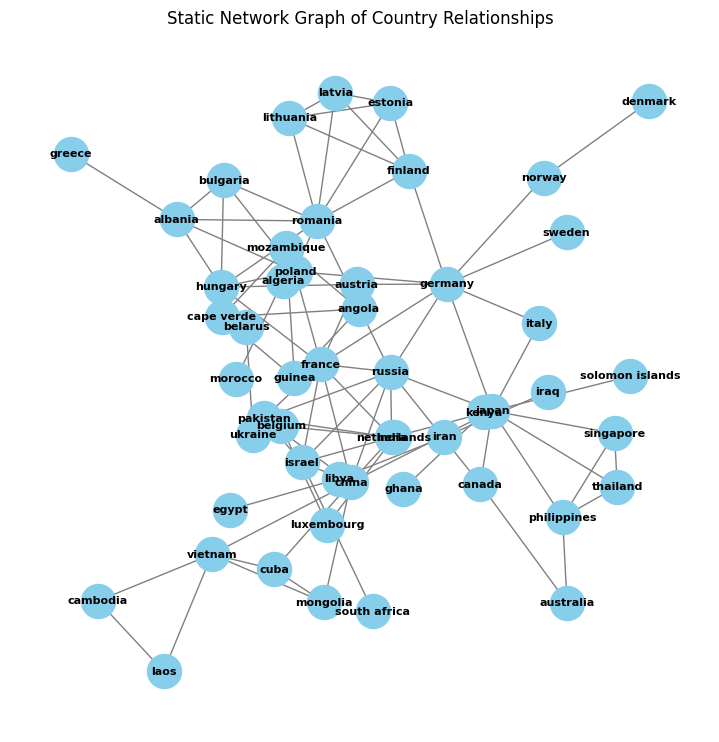

In [7]:
# Graph visualisation with NetworkX
h = plt.figure(figsize=(7,7))
pos = nx.kamada_kawai_layout(G)  

nx.draw(
    G,
    pos=pos,
    with_labels=True,
    node_color='skyblue',      
    node_size=600,
    edge_color='gray',
    font_size=8,
    font_weight='bold'
)

plt.title("Static Network Graph of Country Relationships")
plt.show()

In [8]:
h.savefig('networkx_plt_20th_century.png')

### 3. Graph Visualisation - Pyvis

In [9]:
# Define the PyVis network
net = Network(
    notebook=True,
    width="900px",
    height="800px",
    bgcolor="#222222",
    font_color="white"
)


Local cdn resources have problems on chrome/safari when used in jupyter-notebook. 


In [10]:
# Define node size based on number of connections
node_degree = dict(G.degree)
nx.set_node_attributes(G, node_degree, "size")

In [11]:
# Load NetworkX graph into PyVis
net.from_nx(G)

In [12]:
net.show_buttons(filter_=["physics"])
net.repulsion()

In [13]:
# Save the output HTML
net.show("network_interactive.html")


### 4. Community detection - Leiden Algorithm

In [14]:
# Import library
from cdlib import algorithms
coms = algorithms.leiden(G)
print(len(coms.communities))

Note: to be able to use all crisp methods, you need to install some additional packages:  {'graph_tool', 'bayanpy', 'infomap', 'wurlitzer'}
Note: to be able to use all crisp methods, you need to install some additional packages:  {'ASLPAw', 'pyclustering'}
Note: to be able to use all crisp methods, you need to install some additional packages:  {'infomap', 'wurlitzer'}
11


11 communities

### 5. Visualise communities

In [15]:
# Map each node to its community 
new_com = coms.to_node_community_map()
dict_com = {k: v[0] for k, v in new_com.items()}  
nx.set_node_attributes(G, dict_com, "community")

In [16]:
# Import library
import random

In [17]:
os.makedirs("outputs", exist_ok=True)

In [18]:
net = Network(
    notebook=True,
    width="900px",
    height="800px",
    bgcolor="#222222",
    font_color="white"
)


Local cdn resources have problems on chrome/safari when used in jupyter-notebook. 


In [19]:
net.show_buttons(filter_=["physics"])
net.repulsion()

In [21]:
# Colour nodes by community 
communities = sorted(set(dict_com.values()))
palette = {c: "#{:06x}".format(random.randint(0x444444, 0xFFFFFF)) for c in communities}


In [23]:
# Add nodes from G with community colour and degree size
for n in G.nodes():
    c = G.nodes[n].get("community", -1)
    net.add_node(
        n,
        label=n,
        color=palette.get(c, "#888888"),
        size=8 + 3*node_degree.get(n, 1)
    )

In [24]:
# Add edges
for u, v, d in G.edges(data=True):
    w = d.get("value", 1)
    net.add_edge(u, v, value=w, title=f"weight: {w}")

In [25]:
# Save HTML 
net.show("outputs/network_leiden.html")
print("Saved → outputs/network_leiden.html")

Saved → outputs/network_leiden.html


In [26]:
# Save beisde the notebook too
net.show("network_leiden.html")
print("Saved → network_leiden.html")

Saved → network_leiden.html


The Leiden algorithm identified 11 distinct country communities, which can be seen as colour clusters in the network.European countries (blue and purple) are tightly connected, while Asian and Middle Eastern countries (brown and red) form separate clusters. Some countries like Germany, France, and Japan act as central hubs that link multiple communities. 

The viualisation shows that political or historical ties between regions are reflected in the network structure. Densely connected groups suggest regional cooperation or shared influence, while isolated nodes like Kenya or Ghana show weaker integration within the overall network.


### 6. Centrality measures

In [27]:
# Degree centrality
degree_dict = nx.degree_centrality(G)

In [28]:
degree_df = pd.DataFrame(degree_dict.items(), columns=['country', 'centrality'])

In [29]:
degree_df.sort_values(by='centrality', ascending=False, inplace=True)

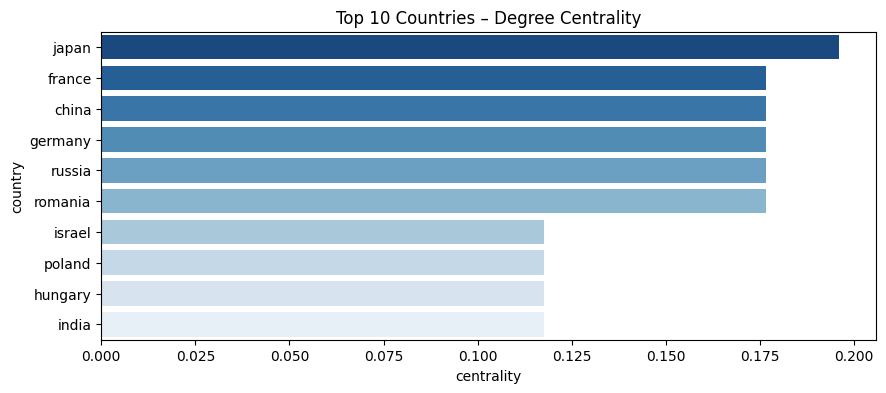

In [30]:
# Plot degree centrality
plt.figure(figsize=(10,4))
sns.barplot(x='centrality', y='country', data=degree_df.head(10), palette='Blues_r')
plt.title('Top 10 Countries – Degree Centrality')
plt.show()

In [31]:
# Closeness centrality
closeness_dict = nx.closeness_centrality(G)

In [32]:
closeness_df = pd.DataFrame(closeness_dict.items(), columns=['country', 'centrality'])

In [33]:
closeness_df.sort_values(by='centrality', ascending=False, inplace=True)

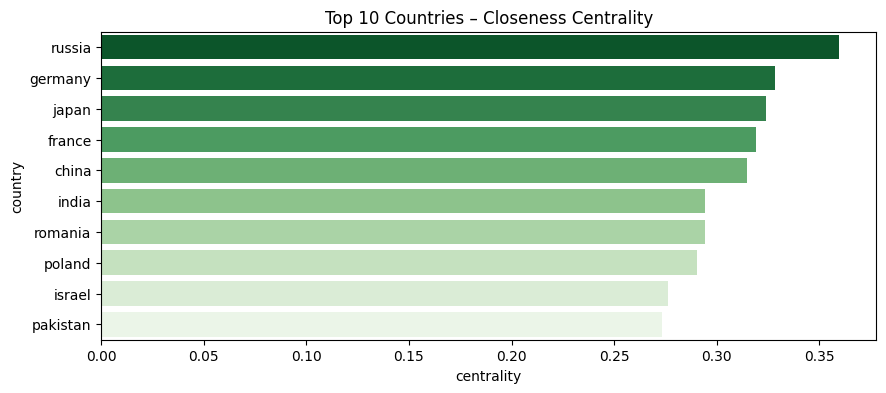

In [34]:
plt.figure(figsize=(10,4))
sns.barplot(x='centrality', y='country', data=closeness_df.head(10), palette='Greens_r')
plt.title('Top 10 Countries – Closeness Centrality')
plt.show()

In [35]:
# Betweenness centrality
betweenness_dict = nx.betweenness_centrality(G)

In [36]:
betweenness_df = pd.DataFrame(betweenness_dict.items(), columns=['country', 'centrality'])

In [37]:
betweenness_df.sort_values(by='centrality', ascending=False, inplace=True)

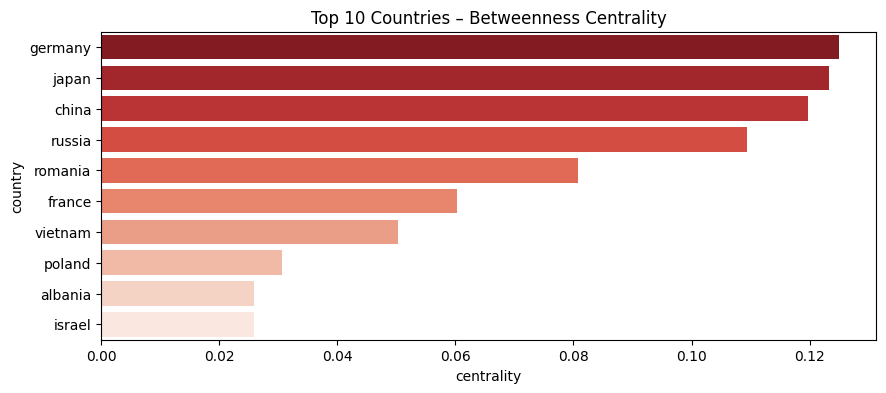

In [38]:
plt.figure(figsize=(10,4))
sns.barplot(x='centrality', y='country', data=betweenness_df.head(10), palette='Reds_r')
plt.title('Top 10 Countries – Betweenness Centrality')
plt.show()

### Centrality measures observations
The centrality measures highlight which countries play the most influential roles within the 20th-century relationship network.

- **Degree centrality** shows the most connected nations — Germany, France, and Japan appear as key hubs.
- **Closeness centrality** identifies countries that are well-positioned to reach others quickly, reflecting geopolitical or economic influence.
- **Betweenness centrality** reveals countries that act as bridges between otherwise separate regions — for example, Russia or China linking Europe and Asia.

These results reinforce the historical and political roles these countries played in shaping international connections during the 20th century.


In [39]:
# Save centrality measures
nx.set_node_attributes(G, degree_dict, 'degree_centrality')
nx.set_node_attributes(G, betweenness_dict, 'betweenness_centrality')
nx.set_node_attributes(G, closeness_dict, 'closeness_centrality')


In [40]:
# Combine all centrality measures into one DataFrame (in case I need them later)
centrality_df = pd.DataFrame({
    'degree_centrality': degree_dict,
    'betweenness_centrality': betweenness_dict,
    'closeness_centrality': closeness_dict
})


In [41]:
# Save to CSV beside notebook
centrality_df.to_csv('centrality_measures.csv')

In [42]:
# Check centrality values stored for one country
G.nodes['germany']


{'size': 9,
 'community': 3,
 'degree_centrality': 0.1764705882352941,
 'betweenness_centrality': 0.1250532212885154,
 'closeness_centrality': 0.3285024154589372}